# 1. IMPORT MODULES

In [381]:
import inference
import clustering
import importlib
import loadSaveData
importlib.reload(inference)
importlib.reload(clustering)
importlib.reload(loadSaveData)

<module 'loadSaveData' from 'C:\\Users\\Nagore\\PycharmProjects\\PruebitasMineria\\src\\loadSaveData.py'>

# 2. LOAD TRAIN AND CREATE OR LOAD TEST EMBEDDINGS

In [189]:
train=loadSaveData.loadEmbeddings(length=10000,dimension=768,type='bert')

Cargando embeddings...


In [316]:
test=inference.create_test_embeddings()

You are using a model of type xlm-roberta to instantiate a model of type roberta. This is not supported for all configurations of models and can yield errors.


KeyboardInterrupt: 

In [340]:
test= loadSaveData.loadEmbeddings(length=2000,dimension=768,type='bert')

Cargando embeddings...


# 3. CLUSTERING

## 3.1. DBSCAN ORIGINAL

In [147]:
clusters=loadSaveData.loadClusters('DBScan8Clusters')
print(clusters)

[ 0 -1 -1 ... -1 -1  0]


BUSCAR INDICES DE INSTANCIAS DEL CLUSTER X (train)

In [148]:
instancias_clusterX_train=inference.buscar_instancias_cluster(clusters,4)
print(instancias_clusterX_train)

[908, 1538, 2235, 3106, 3476, 6173, 6473, 8141]


IMPRIMIR INSTANCIA X (train)

In [149]:
instancia_test=inference.imprimir_instancia('../Datasets/Suicide_Detection_train10000(test2000).csv',908)
print(instancia_test)

I can't go onI've been thinking about it for awhile. The pain is just too much now. I spend every night crying myself to sleep. I've made decisions that affect my life drastically that I regret, but I can't go back on. I am not strong enough to continue on. 


AÑADIR AL TEST LAS INSTANCIAS TRAIN QUE NOS INTERESAN

In [150]:
# 2 del cluster 4 (suicide), 2 instancias del cluster 3 (links)
instances_to_add=[908,1538,1894, 2202]
test= inference.add_instances_to_test(train,test,instances_to_add)
print(len(test))

2004


### 3.1.1. ASIGNAR CLUSTERS AL TEST

In [151]:
clusters_test=inference.asignar_cluster_test(train,test,clusters)
print(clusters_test)

[0, -1, -1, 0, -1, 0, 0, -1, -1, -1, -1, -1, -1, 0, 0, -1, -1, -1, -1, 0, -1, 0, -1, 0, 0, 0, -1, 0, -1, -1, 0, -1, -1, 0, 0, -1, -1, 0, -1, 0, 0, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, 0, 0, -1, -1, 0, -1, 0, -1, -1, 0, -1, 0, 0, -1, 0, 0, 0, -1, 0, 0, -1, 0, -1, 0, -1, -1, -1, 0, -1, 0, -1, -1, -1, -1, 0, 0, 0, 0, 0, -1, -1, -1, 0, -1, 0, 0, 0, -1, 0, 0, -1, -1, 0, -1, -1, -1, 0, -1, 0, 0, -1, -1, -1, 0, -1, 0, -1, 0, 0, 0, -1, -1, 0, -1, -1, 6, -1, 0, 0, 0, -1, 0, 0, -1, -1, -1, -1, 0, 0, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, 0, -1, 0, -1, 7, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, -1, 0, -1, 0, -1, 0, 0, 0, -1, -1, -1, 0, 0, -1, 0, 0, -1, -1, 0, 0, -1, 0, 0, -1, 0, -1, -1, 0, 0, -1, 0, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, 0, -1, -1, -1, 0, -1, -1, 0, -1, 0, 0, 0, -1, -1, -1, -1, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, -1, 0, 0, -1, -1, -1, -1, -1, -1, 0, 0, 0, -1, 0, -1, 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, -1, 0, -1, 0, -1, -1, -1, -1, 

BUSCAR INDICES DE INSTANCIAS DEL CLUSTER X (test)

In [154]:
instancias_clusterX_test=inference.buscar_instancias_cluster(clusters_test,4)
print(instancias_clusterX_test)

[1253, 2000, 2001]


IMPRIMIR INSTANCIA X (test)

In [155]:
instancia_test=inference.imprimir_instancia('../Datasets/Suicide_Detection_test2000(train10000).csv',1253)
print(instancia_test)

Don't know what to doSeven years ago, I quit cutting and promised everyone who mattered to me I never would again. This morning I woke up covered in broken promises and I just want more. Even back then, I never had any real intention of taking it further but now, I can't stop wanting it.


REDUCIR DIMENSIONES - 2D

In [156]:
train_reducido,test_reducido=inference.reducir_dim(train,test,2)

Dim train originally:  (10000, 768)
Dim train after PCA:  (10000, 2)
Dim test originally:  (2004, 768)
Dim test after PCA:  (2004, 2)


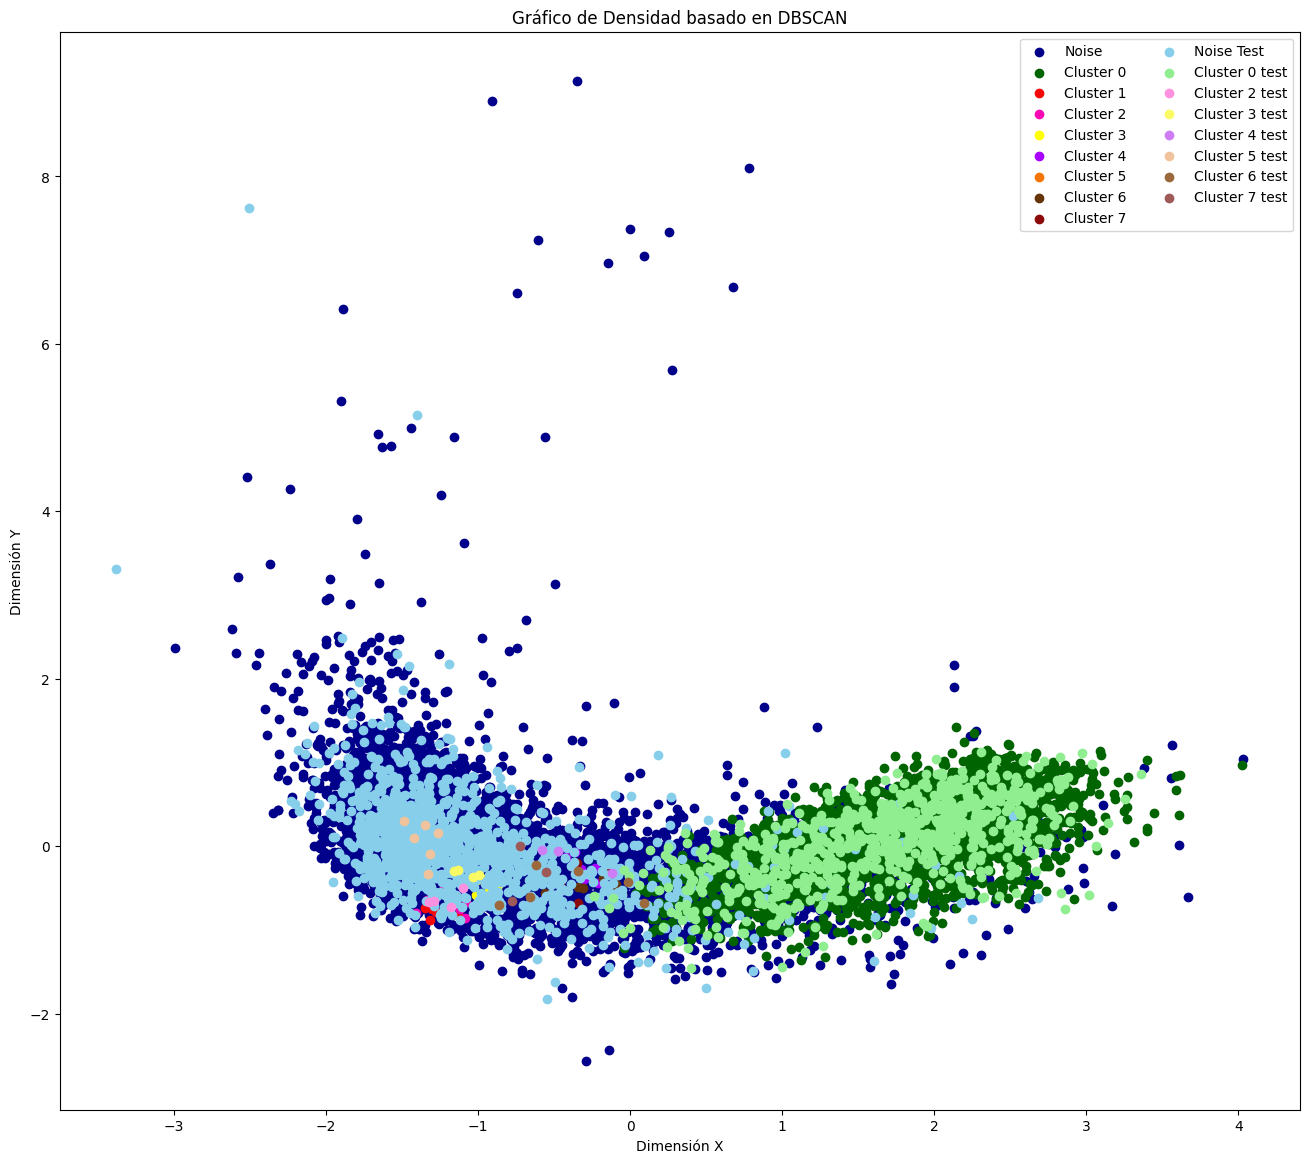

In [195]:
inference.grafico(train_reducido,clusters,test_reducido,clusters_test)

REDUCIR DIMENSIONES - 3D

In [196]:
train_reducido,test_reducido=inference.reducir_dim(train,test,3)

Dim train originally:  (10000, 768)
Dim train after PCA:  (10000, 3)
Dim test originally:  (2004, 768)
Dim test after PCA:  (2004, 3)


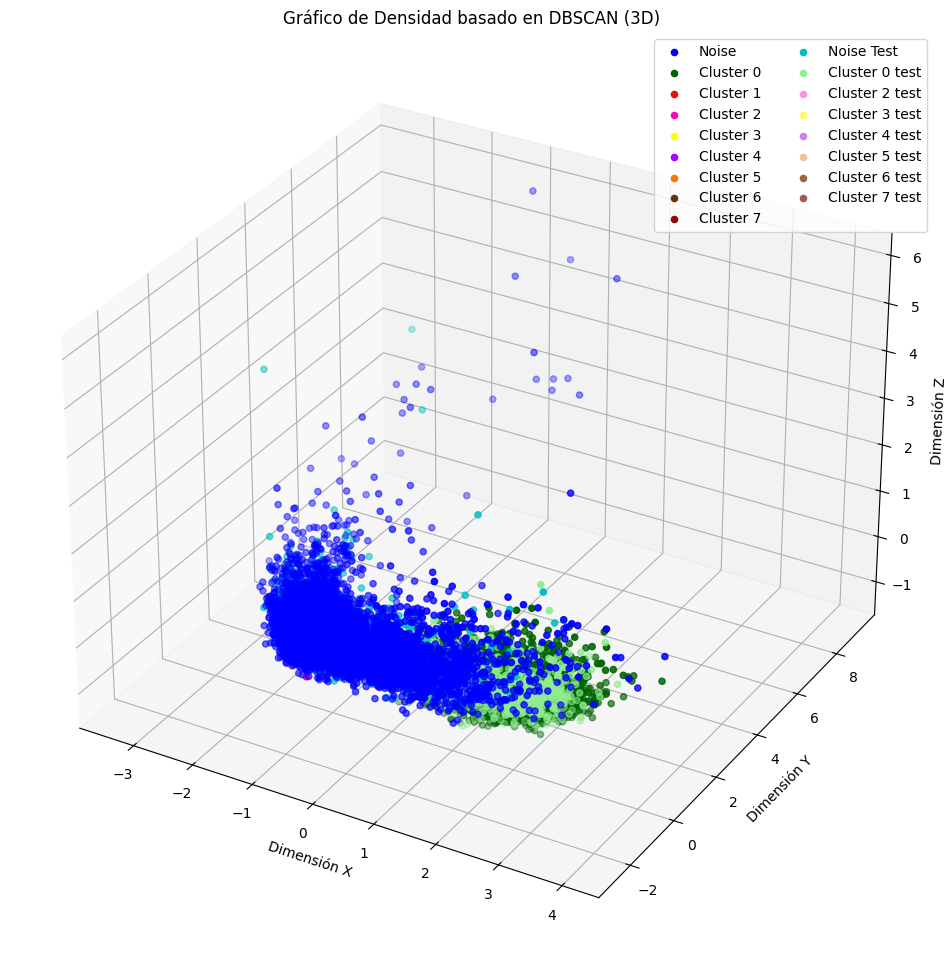

In [199]:
inference.grafico_3d(train_reducido,clusters,test_reducido,clusters_test)

## 3.2. DBSCAN IMPLEMENTADO

In [318]:
clusters=loadSaveData.loadClusters('Urruela12Clusters')
print(clusters)

[0 1 1 ... 1 1 0]


BUSCAR INDICES DE INSTANCIAS DEL CLUSTER X (train)

In [341]:
instancias_clusterX_train=inference.buscar_instancias_cluster(clusters,2)
print(instancias_clusterX_train)

[38, 360, 397, 407, 451, 761, 1002, 1023, 1202, 1257, 1345, 1467, 1492, 1811, 1823, 1853, 2097, 2141, 2407, 2411, 2612, 2675, 2845, 3101, 3778, 3917, 3971, 4511, 4556, 4852, 5023, 5059, 5417, 5506, 5510, 5970, 6273, 6498, 6502, 6508, 6594, 6623, 6980, 7010, 7168, 7201, 7406, 7649, 7708, 7825, 7915, 8062, 8411, 8548, 8892, 8954, 8977, 9195, 9291, 9294, 9464, 9851, 9859, 9988]


IMPRIMIR INSTANCIA X (train)

In [342]:
instancia_test=inference.imprimir_instancia('../Datasets/Suicide_Detection_train10000(test2000).csv',397)
print(instancia_test)

My wife wants a divorce.. 

My wife and I are splitting up. Its because of years of me choosing weed over my family like my sons birthday, my anniversary, all of it... It's all my fault. The women that I spent 5 years of my life married too, had a wonderful unbelievably amazing daughter and son with.. Idk how to do this.

All I want is to kill myself. I don't want to think about.. splitting up material bullshit.. or .. fuck man.. or even how we're suppose to talk to each other now. I'm madly in love with this woman but.. somehow it wasn't enough to overcome my own selfishness. I've ruined the only thing I've ever wanted, a real family. I don't know where I'm suppose to go.. how do I drive now that I'm leaving her with the car, the bills, the kids, my heart, fuck... everything is with this woman. I couldn't stand to see her happy with someone else, but I do wish her nothing but happiness. I just.. she's been kissing me and I was just told its because I want it. She doesn't even want to 

AÑADIR AL TEST LAS INSTANCIAS TRAIN QUE NOS INTERESAN

In [343]:
# 2 instancias cluster 2 (suicidio) y 2 del cluster 4 (links)
instances_to_add=[360, 397,603, 623]
test= inference.add_instances_to_test(train,test,instances_to_add)
print(len(test))

2004


### 3.1.1. ASIGNAR CLUSTERS AL TEST - INSTANCIA MAS CERCANA

In [344]:
clusters_test=inference.asignar_cluster_test(train,test,clusters)
print(clusters_test)

[0, 1, 1, 0, 1, 0, 0, 1, 4, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 7, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, -1, 0, 0, 0, 1, 1, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 7, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, -1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1

BUSCAR INDICES DE INSTANCIAS DEL CLUSTER X (test)

In [350]:
instancias_clusterX_test=inference.buscar_instancias_cluster(clusters_test,2)
print(instancias_clusterX_test)

[189, 359, 437, 550, 615, 724, 812, 1333, 1784, 2000, 2001]


IMPRIMIR INSTANCIA X (test)

In [357]:
instancia_test=inference.imprimir_instancia('../Datasets/Suicide_Detection_test2000(train10000).csv',359)
print(instancia_test)

Someone pls hear my out.I’m not suicidal let me just say that first. but I feel as if I’m alone asf. Like I just don’t have anyone to talk to about anything. Like even typing this out is making me feel some type of way. Idk I just want to be able to express myself in front of people and not feel like I’m being judged and shit. I usually smoke weed to help me cope but I don’t wanna do that anymore. I’m not asking for sympathy or anything I really just want to get some things out. Idk I can’t even finish this shit without crying. My life man. It’s crazy. I just need to be stronger mentally I guess idk. I just turned 20 a few days ago and not too many people actually remembered. It’s not really the fact that a lot of people didn’t tell me happy birthday it’s more of the fact that people that I expected to tell me didn’t. At the same time I feel like I have no one at all to talk to about my problems. Like I know I have people there for me but I don’t even know how I would approach them and

REDUCIR DIMENSIONES - 2D

In [375]:
train_reducido,test_reducido=inference.reducir_dim(train,test,2)

Dim train originally:  (10000, 768)
Dim train after PCA:  (10000, 2)
Dim test originally:  (2004, 768)
Dim test after PCA:  (2004, 2)


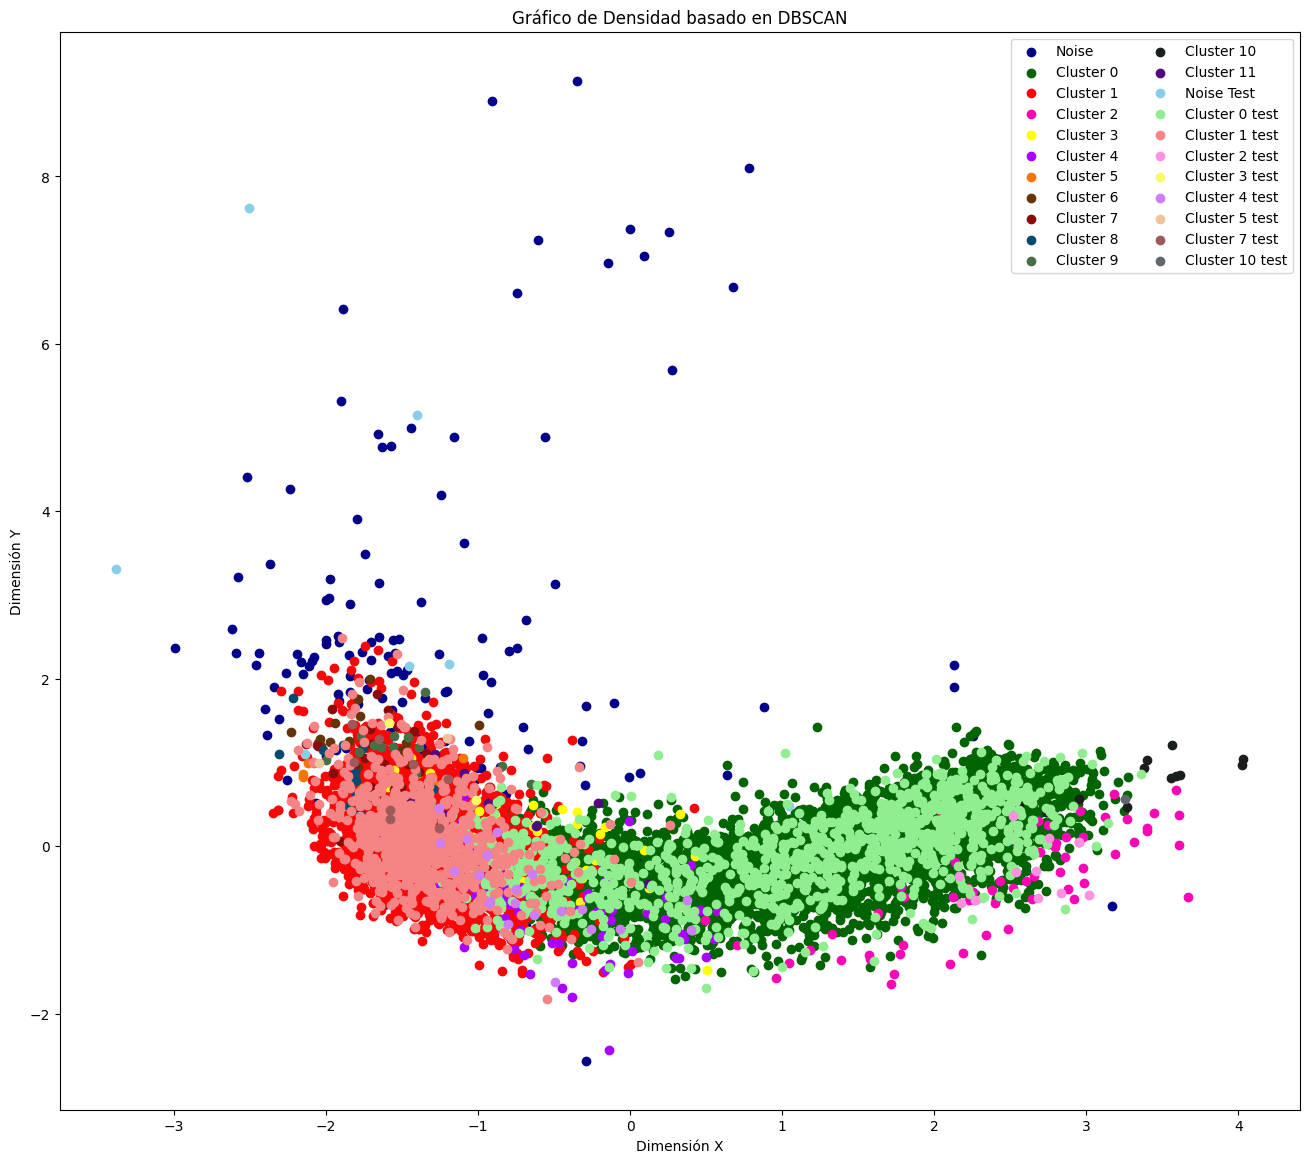

In [382]:
inference.grafico(train_reducido,clusters,test_reducido,clusters_test)

REDUCIR DIMENSIONES - 3D

In [377]:
train_reducido,test_reducido=inference.reducir_dim(train,test,3)

Dim train originally:  (10000, 768)
Dim train after PCA:  (10000, 3)
Dim test originally:  (2004, 768)
Dim test after PCA:  (2004, 3)


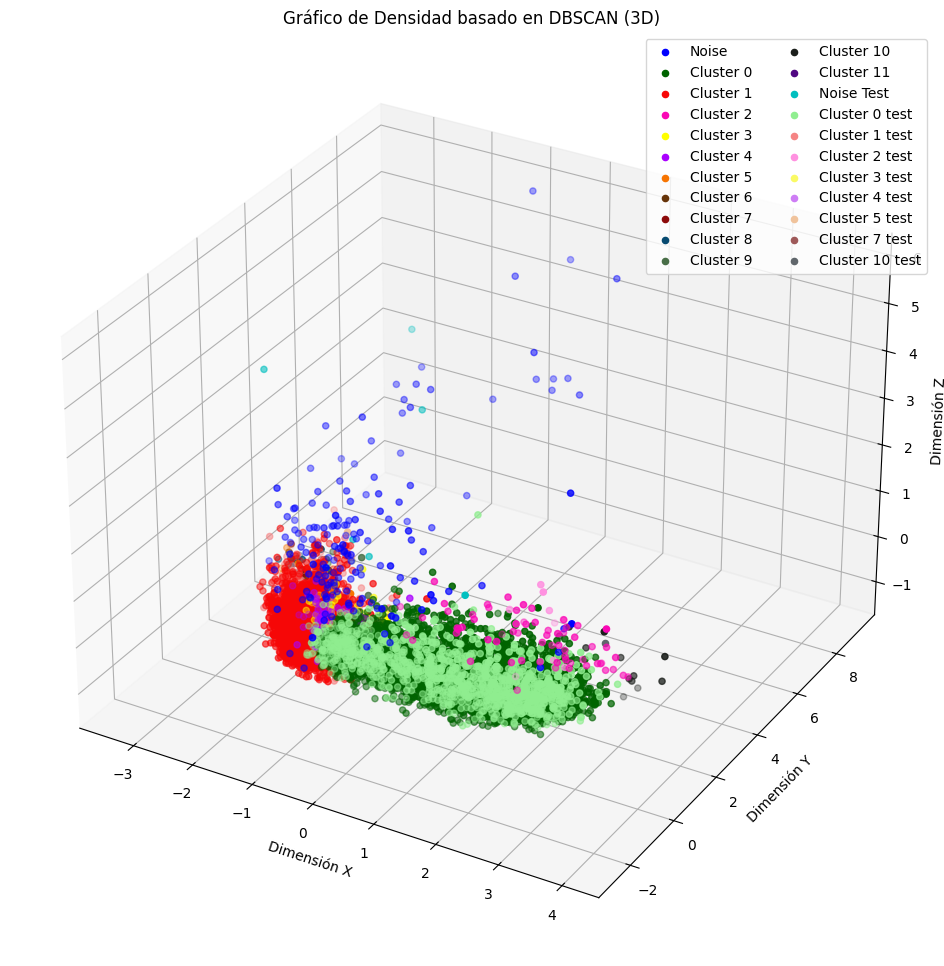

In [383]:
inference.grafico_3d(train_reducido,clusters,test_reducido,clusters_test)